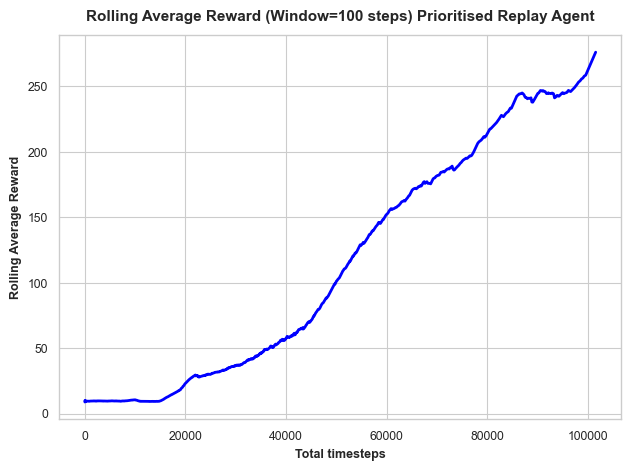

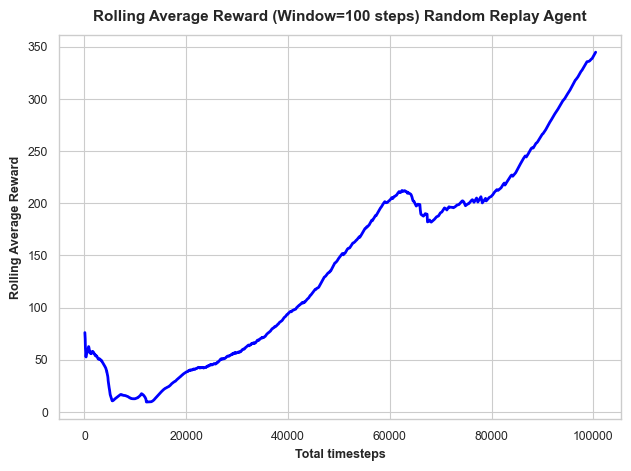

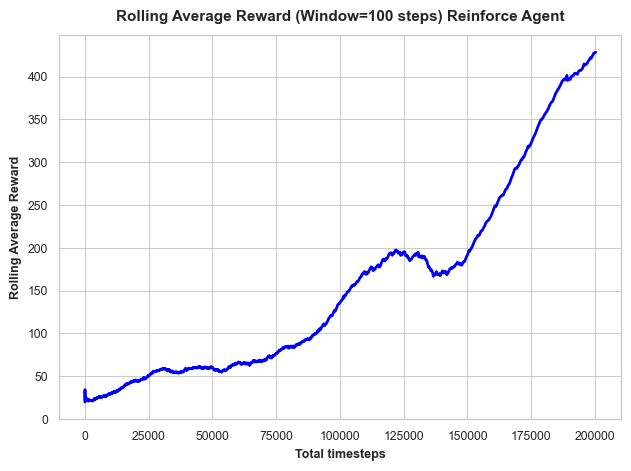

In [162]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rolling_average_rewards(file_path, replay, window_size=1000):
    episodes = []
    rewards = []

    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            episodes.append(data['total_steps'])
            rewards.append(data['reward'])

    rewards_series = pd.Series(rewards)
    rolling_average_rewards = rewards_series.rolling(window=window_size, min_periods=1).mean()

    sns.set_style("whitegrid")
    sns.set_palette("Set1")  # Example of using a different color palette
    
    # Plotting with Seaborn
    sns.lineplot(x=episodes, y=rolling_average_rewards, linewidth=2, color='blue')  # Customizing line width and adding markers
    sns.set_context("paper") 

    #plt.plot(episodes, rolling_average_rewards)
    # plt.text(0.5, 0.9, 'Rolling Average Reward (Window Size: {window_size})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.xlabel('Total timesteps',fontdict={'fontsize': 9, 'fontweight': 'bold'})
    plt.ylabel('Rolling Average Reward',fontdict={'fontsize': 9, 'fontweight': 'bold'})
    plt.title(f'Rolling Average Reward (Window={window_size} steps) {replay} Agent',fontdict={'fontsize': 11, 'fontweight': 'bold'}, pad=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    

# DDDQN - Prioritised
plot_rolling_average_rewards('./logs/prioritised_replay/CN8e-05_LR1e-05_B128.txt', "Prioritised Replay", window_size=100)

# DDDQN - Random
plot_rolling_average_rewards('./logs/random_replay/CN8e-05_LR1e-05_B128.txt', "Random Replay", window_size=100)


# Reinforce
plot_rolling_average_rewards('./logs/reinforce/LR0.001.txt', "Reinforce", window_size=100)